# Data Exploration & Manipulation

***

## Problem Statement and Data Description

### **Chennai House Price Prediction (Regression)**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.
    
They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.
   
Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.


### Data Description

## House Features

## House Features
  
   * INT_SQFT – The interior Sq. Ft of the property
       * N_BEDROOM – The number of Bed rooms
       * N_BATHROOM - The number of bathrooms
       * N_ROOM – Total Number of Rooms
       * QS_ROOMS – The quality score assigned for rooms based on buyer reviews
       * QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
       * QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
       * QS_OVERALL – The Overall quality score assigned for the property
       * SALE_COND – The Sale Condition
           - Normal: Normal Sale
           - Abnorml: Abnormal Sale - trade, foreclosure, short sale
           - AdjLand: Adjoining Land Purchase
           - Family: Sale between family members
           - Partial: Home was not completed when last assessed
       * BUILDTYPE – The type of building
            - House
            - Commercial
            - Others


## Surrounding and Locality

   * AREA – The property in which the real estate is located
   * DIST_MAINROAD – The distance of the property to the main road
   * PARK_FACIL – Whether parking facility is available
   * UTILITY_AVAIL
         - AllPub: All public Utilities (E,G,W,& S)
         - NoSewr: Electricity, Gas, and Water (Septic Tank)
         - NoSeWa: Electricity and Gas Only
         - ELO: Electricity only
   * STREET
         - Gravel
         - Paved
         - No Access
   * MZZONE
         - A: Agriculture
         - C: Commercial
         - I: Industrial
         - RH: Residential High Density
         - RL: Residential Low Density
         - RM: Residential Medium Density


## House Sale Price

   * PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   * COMMIS – The Commission paid to the agent
   * SALES_PRICE – The total sale price of the property

#### Loading the DataSet

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("C:\ML - DataSet/chennai_house_price_prediction.csv")
df.shape

(7109, 19)

In [142]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# ---------------  Data Exploration  -----------------

In [143]:
# for continuous variables only
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


    * std - gives the variance & range of the variables 
    * Works for continuous variables
    * We can identify the missing values from 'count' given
    * Comparing 75% & max values, determine presence of outliers

In [144]:
# for both continuous & categorical variables
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P06177,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


    * Gives unique values for categorical variables

In [145]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [146]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

## Data types

In [147]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

* int64 - continuous variables
* object,float64 - categorical variables

In [148]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


In [149]:
df['N_BEDROOM']

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

## Univariate Analysis

### Histogram

    Bins can be useful for going from a continuous variable to a categorical variable, insted of counting unique applications of values, divide the index in the specified number of half open bins

Text(0.5, 0, 'Sales')

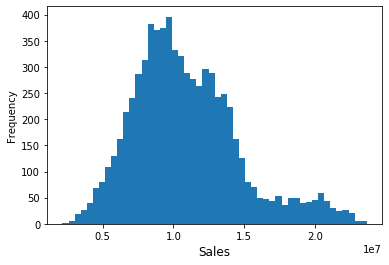

In [150]:
## target variable
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales',fontsize=12)

* The distribution of the target variable is slightly right skewed
* We can see a small no of houses with a very high price

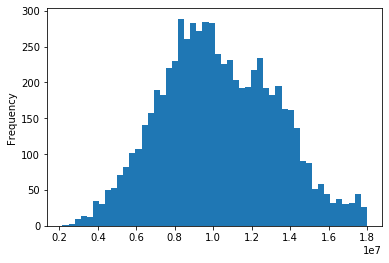

In [151]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

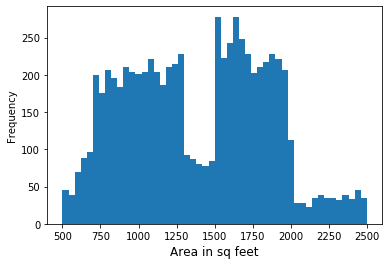

In [152]:
## Area of house in square feet
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Area in sq feet',fontsize=12)

## Value Counts

In [153]:
# no of bedrooms
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

    It has 4 different categories
    This variable should be object and not integer

In [154]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

* About 53% houses have 1 bedroom
* 33% have 2 bedrooms
* Less than 10% houses have 3 bedrooms
* Only 3.5% have 4 bedrooms

In [155]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [156]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

* 78% houses have 1 bathroom and 21% have 2 bathroom

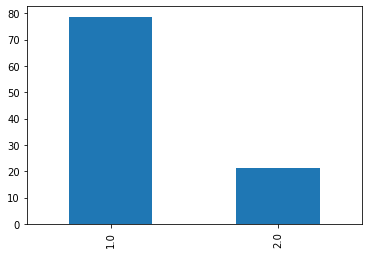

In [157]:
(df['N_BATHROOM'].value_counts()/len(df)*100).plot.bar()

## Bar Plot

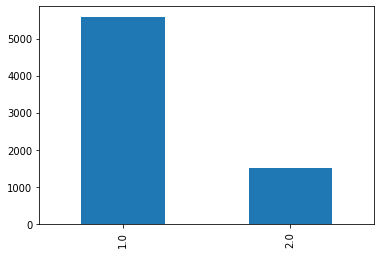

In [158]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Number Of Houses')

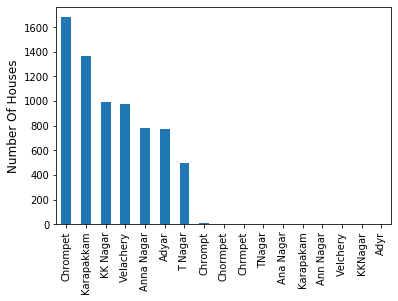

In [159]:
df['AREA'].value_counts().plot(kind='bar')
plt.ylabel('Number Of Houses',fontsize=12)

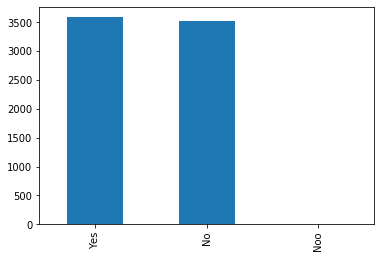

In [160]:
# houses with parking facility
df['PARK_FACIL'].value_counts().plot.bar()

In [161]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

* Their are 2 unique categories
* The no of houses with parking facility in both the cases is almost the same

# <span style="color:blue">------   Data Manipulation  ------<span>

### (i) Drop Duplicates(if any)

In [162]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [163]:
df.drop_duplicates(subset = ['AREA'])

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
22,P06851,KK Nagar,2010,114,3.0,2.0,5,Partial,No,Others,NoSewr,Gravel,RH,3.4,4.5,3.4,3.730,262210,10925400
24,P00902,TNagar,1972,111,2.0,1.0,5,AdjLand,No,Others,NoSewr,No Access,RH,4.1,4.4,2.8,3.590,167073,13922760
25,P00293,T Nagar,1685,105,1.0,1.0,4,Family,No,House,NoSewr,Gravel,RM,2.8,4.4,4.0,3.740,176415,12601080
175,P00920,Chrompt,869,39,1.0,1.0,3,Family,No,Others,NoSewr,No Access,RM,4.3,4.8,3.3,4.200,138935,8172630
245,P00166,Chrmpet,1277,111,2.0,1.0,4,AdjLand,Yes,Commercial,AllPub,No Access,RM,4.0,3.8,3.4,3.740,47131,15710400


In [164]:
df.drop_duplicates().shape

(7109, 19)

In [165]:
df.drop_duplicates(subset = ['AREA']).shape

(17, 19)

In [166]:
df.shape

(7109, 19)

### (ii) Fill the missing values

In [167]:
# missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

    "Different ways to deal with missing values"
    
    * Remove the rows/columns with missing values
    * For Continuous variables - Mean or Median
    * For Categorical variables - Mode
    * using other independent variables

In [168]:
# Drop rows with missing values(drop any rows that are having missing vakues - dropna)   [0-rows & 1-columns]
df.dropna(axis=0,how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [169]:
# when ais is set to 1, columns are droped
df.dropna(axis=1,how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


## 1. N_BEDROOM

In [170]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [171]:
# fillna- fill the missing values , inplace - display changes in original dataset
df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

## 2. N_BATHROOM

In [172]:
df.loc[df['N_BATHROOM'].isnull() == True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [192]:
for i in range (0,len(df)):
    if pd.isnull(df["N_BATHROOM"][i]) == True:
        if(df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        
        else:
            df['N_BATHROOM'][i] = 2.0 
            

## 3. QS_OVERALL

In [174]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [175]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'],temp],axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [176]:
df.loc[df['QS_OVERALL'].isnull() == True].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,148,3.0,2.0,5,Family,No,Commercial,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,188569,15714080
46,P09483,T Nagar,1882,189,2.0,1.0,5,AbNormal,Yes,Others,ELO,Gravel,RM,3.9,4.5,4.7,NaN,272877,16051580
86,P00545,Chrompet,1085,149,1.0,1.0,3,AbNormal,Yes,Commercial,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,100545,14363500
111,P06768,Adyar,1034,73,1.0,1.0,3,AdjLand,Yes,Others,ELO,Gravel,C,3.8,3.3,3.5,NaN,46284,9256740
134,P00089,T Nagar,1942,10,2.0,1.0,5,Family,No,House,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,61654,12330740


In [177]:
df.loc[df['QS_OVERALL'].isnull() == True].shape

(48, 19)

In [178]:
def fill_na(x):
    return((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [193]:
# apply - x goes through every rows
df['QS_OVERALL'] = df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'] , axis=1)

In [194]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

# --------------- Data Types -----------------

In [181]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [196]:
# data type of n_bedroom , n_room , n_bathroom
# astype is used to change the datatypes of the variables
# in dictionary form with ----  variable : datatypes

df = df.astype({'N_BEDROOM':'object', 'N_ROOM':'object', 'N_BATHROOM':'object'})

### Replace Categories

In [183]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('********************** Value Count in' , i , '***************************')
    print(df[i].value_counts())
    print('')

********************** Value Count in AREA ***************************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

********************** Value Count in N_BEDROOM ***************************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

********************** Value Count in N_BATHROOM ***************************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

********************** Value Count in N_ROOM ***************************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

********************** Value Count in SALE_COND ***************************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNor

### Updated names in column
    
    * AREA
    * SALE_COND
    * PARK_FACIL
    * BUILDTYPE
    * UTILITY_AVAIL
    * STREET

In [197]:
df['PARK_FACIL'].replace({'Noo':'No'} , inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [185]:
df['AREA'].replace({'TNagar':'T nagar', 'Adyr':'Adyar' , 'KKNagar':'KK Nagar' , 'Chrompt':'Chrompet' , 'Chormpet':'Chrompet' , 
                   'Chrmpet':'Chrompet' , 'Ana Nagar':'Anna Nagar' , 'Ann Nagar':'Anna Nagar' , 'Karapakam':'Karapakkam' ,
                   'Velchery':'velachery'} , inplace = True)

In [186]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      979
Anna Nagar     788
Adyar          774
T Nagar        496
T nagar          5
velachery        2
Name: AREA, dtype: int64

In [187]:
df['SALE_COND'].replace({'Partiall':'Partial' , 'Partiall':'Partial' , 'Adj land':'AdjLand' , 'Ab Normal':'AbNormal'}, inplace=True)

In [188]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1432
Normal Sale    1423
AbNormal       1411
Family         1403
Adj Land          6
PartiaLl          1
Name: SALE_COND, dtype: int64

#  <span style="color:purpel">---------- Bivariate Analysis ------------</span>

In [201]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

#### '' Hypothesis ''

* Sales price should increase with increase in interior square feet
* The sales price would depend on the area where house is located
* Higher the no of rooms,bathrooms in the house, more should be the price

### 1.Interior area and sales price(target)

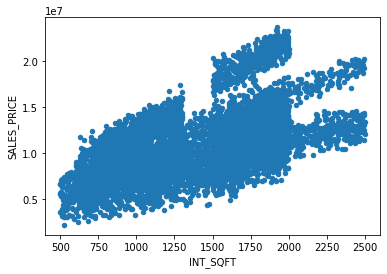

In [203]:
# interior area and sales price(target)
df.plot.scatter('INT_SQFT' , 'SALES_PRICE')

    * A very clear relationship can be seen between the interior area & sales price
    * These variables have a positive correlation

KeyError: 'Other'

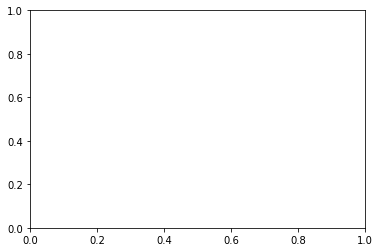

In [208]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c = df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

#### 2. Sales price against no of bedroom & bathroom

In [209]:
# sales price of houses wrt number of bedrooms and bathrooms
df.pivot_table(values = 'SALES_PRICE' , index = 'N_BEDROOM' , columns = 'N_BATHROOM', aggfunc = 'median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


### 3.QS_OVERALL & Sales Price

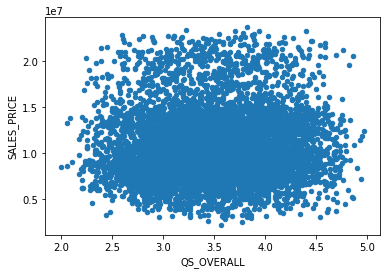

In [210]:
df.plot.scatter('QS_OVERALL' , 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

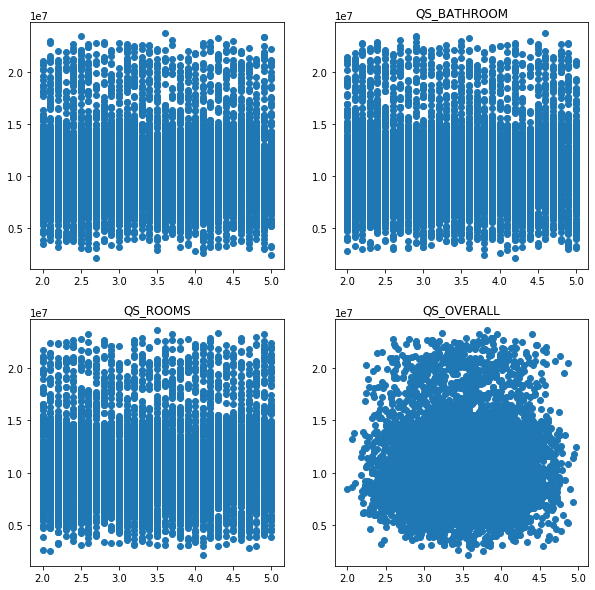

In [211]:
fig, axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BEDROOM'] , df['SALES_PRICE'])
axs[0,1].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'] , df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'] , df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'] , df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')

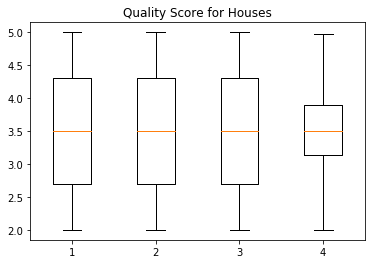

In [212]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality Score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'] , df['QS_ROOMS'] , df['QS_BATHROOM'] , df['QS_OVERALL']])

    * Distibution of number of houses in each quartile is same for 'QS_ROOMS' , 'QS_BATHROOMS' , 'QS_BEDROOM'
    * For QS_OVERALL, 50% of values lie in a very small range of ~3.2 to 3.7 score

### 4. Building type and sales price

In [213]:
# Sales Price baseed on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Comercial      9982225
Commercial    13360440
House          8985370
Other          8104760
Others         9643160
Name: SALES_PRICE, dtype: int64

    * Houses built for commercial purpose have a considerably higher sale price
    * Houses with additional facility should have higher price

In [214]:
temp_df = df.loc[(df['BUILDTYPE'] == 'Commercial') & (df['AREA'] == 'Anna Nagar')]

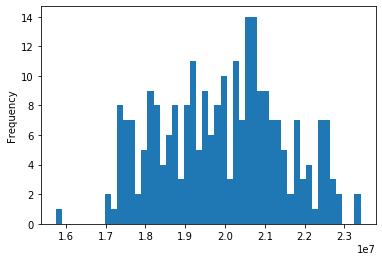

In [215]:
temp_df['SALES_PRICE'].plot.hist(bins=50)

### 5. Building type & parking facility

In [216]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Comercial   No            12617700.0
            Yes            7346750.0
Commercial  No            12695370.0
            Yes           13926030.0
House       No             8514140.0
            Yes            9468150.0
Other       No             7138467.5
            Yes           10148412.5
Others      No             9136095.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

In [219]:
temp = df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

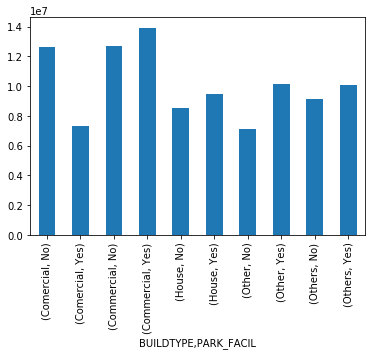

In [220]:
temp.plot(kind = 'bar' , stacked = True)

### 6. Area-wise price for houses

In [221]:
df.pivot_table(values='SALES_PRICE',index='AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14051070
T nagar,13922760
Velachery,10494410
velachery,11389380


In [222]:
temp_df = df.loc[(df['AREA'] == 'Karapakkam')]

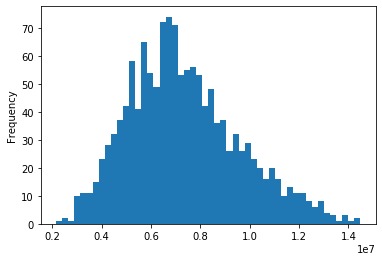

In [223]:
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [224]:
temp_df = df.loc[(df['AREA'] == 'Anna Nagar')]

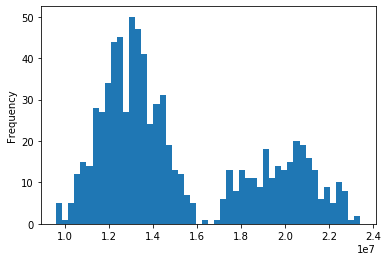

In [225]:
temp_df['SALES_PRICE'].plot.hist(bins=50)

### 7. Distance from main road

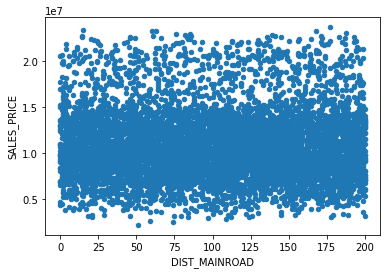

In [226]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

### 8. Type of street around the house

In [227]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9418295
NoAccess      8372750
Pavd         10947560
Paved        10468415
Name: SALES_PRICE, dtype: int64

## House Sales Price

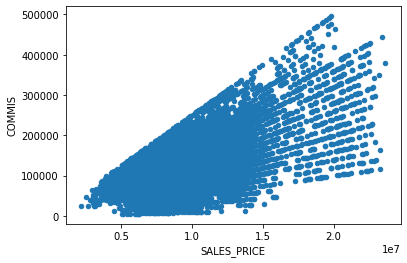

In [228]:
df.plot.scatter('SALES_PRICE','COMMIS')

In [229]:
df[['SALES_PRICE','COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000
